# Eigenvalues and Eigenvectors


$$A\,x=\lambda\,x$$


where $\lambda$ are the scale factors. 

## Linear transformations:

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our matrix

a_matrix = np.array([[2, 0],[0, 1]])

In [3]:
print(a_matrix)

[[2 0]
 [0 1]]


### Any vector:

In [4]:
# Define our vector

x = np.array([[1],[1]])

In [5]:
print(x)

[[1]
 [1]]


In [6]:
# Linear equation
#b = np.dot(a_matrix, x)

b = a_matrix @ x

In [7]:
print(b)

[[2]
 [1]]


In [8]:
print(b[1])

[1]


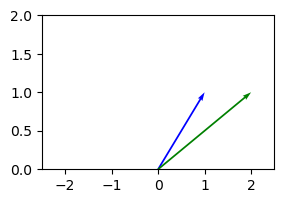

In [9]:
fig, ax = plt.subplots(figsize=(3,2))

plt.quiver(0,0,x[0],x[1], angles='xy', scale_units='xy', scale = 1, color = 'b')
plt.quiver(0,0,b[0],b[1], angles='xy', scale_units='xy', scale = 1, color = 'g')

plt.xlim(-2.5, 2.5)
plt.ylim(0, 2)

plt.show()

### Special vector:

In [10]:
# New vector:
x1 = np.array([[1],[0]])

In [11]:
# Transformed vector

b1 = a_matrix @ x1

In [12]:
print(b1)

[[2]
 [0]]


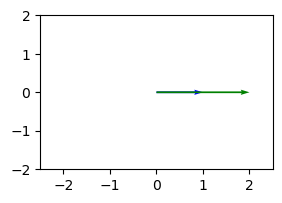

In [13]:
fig, ax = plt.subplots(figsize=(3,2))

plt.quiver(0,0,x1[0],x1[1], angles='xy', scale_units='xy', scale = 1, color = 'b')
plt.quiver(0,0,b1[0],b1[1], angles='xy', scale_units='xy', scale = 1, color = 'g')

plt.xlim(-2.5, 2.5)
plt.ylim(-2, 2)

plt.show()

### 1. Get eigenvalues and eigenvectors using np.linalg.eig

This numpy function computec the eigenvalues and right eigenvectors of a square array.


In [14]:
print(a_matrix)

[[2 0]
 [0 1]]


In [15]:
# Syntax

w_eigenvalues, v_eigenvectors = np.linalg.eig(a_matrix)

In [16]:
# Eigenvalues 

print(w_eigenvalues)

[2. 1.]


In [17]:
# Eigenvectors

print(v_eigenvectors)

[[1. 0.]
 [0. 1.]]


In [17]:
# Define the second eigenvector 

x2 = np.array([[0],[1]])

print(x2)

[[0]
 [1]]


In [18]:
# LT of this vector

b2 = a_matrix @ x2

print(b2)

[[0]
 [1]]


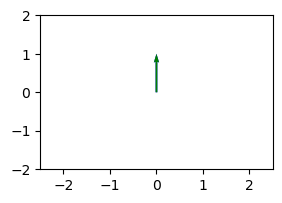

In [19]:
fig, ax = plt.subplots(figsize=(3,2))

plt.quiver(0,0,x2[0],x2[1], angles='xy', scale_units='xy', scale = 1, color = 'b')
plt.quiver(0,0,b2[0],b2[1], angles='xy', scale_units='xy', scale = 1, color = 'g')

plt.xlim(-2.5, 2.5)
plt.ylim(-2, 2)

plt.show()

## 2. Finding the largest eigenvalue

https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter15.02-The-Power-Method.html

Assume $\lambda_1$ is the largest eigenvalue, as $k$ grows the following equation will converge to the first term.

$$ Ax_{k-1} = \lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n] = \lambda_1x_k$$ 

In [20]:
w, v = np.linalg.eig(a_matrix)

print(w)

[2. 1.]


In [23]:
iteration = 20

for i in range(iteration):
    x = np.dot(a_matrix, x)
    #print(x)
    fac = np.max(abs(x))
    x_n = x / np.max(x)
    print(fac, x_n)

16 [[1.    ]
 [0.0625]]
32 [[1.     ]
 [0.03125]]
64 [[1.      ]
 [0.015625]]
128 [[1.       ]
 [0.0078125]]
256 [[1.        ]
 [0.00390625]]
512 [[1.        ]
 [0.00195312]]
1024 [[1.000000e+00]
 [9.765625e-04]]
2048 [[1.0000000e+00]
 [4.8828125e-04]]
4096 [[1.00000000e+00]
 [2.44140625e-04]]
8192 [[1.00000000e+00]
 [1.22070312e-04]]
16384 [[1.00000000e+00]
 [6.10351562e-05]]
32768 [[1.00000000e+00]
 [3.05175781e-05]]
65536 [[1.00000000e+00]
 [1.52587891e-05]]
131072 [[1.00000000e+00]
 [7.62939453e-06]]
262144 [[1.00000000e+00]
 [3.81469727e-06]]
524288 [[1.00000000e+00]
 [1.90734863e-06]]
1048576 [[1.00000000e+00]
 [9.53674316e-07]]
2097152 [[1.00000000e+00]
 [4.76837158e-07]]
4194304 [[1.00000000e+00]
 [2.38418579e-07]]
8388608 [[1.0000000e+00]
 [1.1920929e-07]]


## 3. The QR method:

This is a method to find the eigenvalues of a matrix in one go.

We say that 2 square matrices $A$ and $B$ are similar if:

$$A = C^{-1}BC$$

In [24]:
# Define a new matrix
b_matrix = np.array([[0, 2], [2, 3]])

# Get the Q and R matrices

q, r = np.linalg.qr(b_matrix)

print(b_matrix)

[[0 2]
 [2 3]]


In [25]:
print('Q:\n', q)

print('R:\n', r)


Q:
 [[ 0. -1.]
 [-1.  0.]]
R:
 [[-2. -3.]
 [ 0. -2.]]


In [26]:
b = np.dot(q, r)
print('QR:\n', b)

QR:
 [[0. 2.]
 [2. 3.]]


In [27]:
# Get eigenvalues in the easy way

print(np.linalg.eig(b_matrix))

EigResult(eigenvalues=array([-1.,  4.]), eigenvectors=array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]]))


In [28]:
# Define # iterations
p = [1, 5, 10, 20]

for i in range(20):
    # Split Q and R matrices
    q, r = np.linalg.qr(b_matrix)
    b_matrix = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(b_matrix)

Iteration 1:
[[3. 2.]
 [2. 0.]]
Iteration 5:
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]
Iteration 10:
[[ 4.00000000e+00  9.53674316e-06]
 [ 9.53674316e-06 -1.00000000e+00]]
Iteration 20:
[[ 4.00000000e+00  9.09484250e-12]
 [ 9.09494702e-12 -1.00000000e+00]]



## QM problem: Hamiltonian, eigenvalues and eigenvectors

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

Consider a quantum system in a state, $\ket{\Psi}$:

$\Psi = \frac{1}{\sqrt{3}}\left[\begin{array}{@{}c@{}}
    i \\
    -i \\
    i 
    \end{array} \right]$
    
The Hamiltonian is represented by the matrix shown below:


$\hat{H} = \left[\begin{array}{@{ }c@{\kern2em} c@{\kern2em} c@{ }}
2 & 1 & 0\\
1 & 2 & 0\\
0 & 0 & 3
\end{array} \right]$

(a) Determine the eigenvalues and eigenvectors of $\hat{H}$. What do the eigenvalues represent?


(b) Which eigenvalue of $\hat{H}$ is most likely to emerge from a measurement?


(c) Find $\langle H \rangle$, $\langle H^2 \rangle$, and $\sigma_H$.


### Solution:

(a) Determine the eigenvalues and eigenvectors of $\hat{H}$. What do the eigenvalues represent?

$\hat{H} = \left[\begin{array}{@{ }c@{\kern2em} c@{\kern2em} c@{ }}
2 & 1 & 0\\
1 & 2 & 0\\
0 & 0 & 3
\end{array} \right]$

In [69]:
# Let's use numpy

# Define the Hamiltonianmatrix

h_matrix = np.array([[2., 1., 0.], [1., 2., 0.],[0., 0., 3.]])

print(h_matrix)
print(h_matrix.shape)

[[2. 1. 0.]
 [1. 2. 0.]
 [0. 0. 3.]]
(3, 3)


In [35]:
# 1. Numpy method

w_eigvalues, v_eigvectors = np.linalg.eig(h_matrix)

print(w_eigvalues)
print(v_eigvectors)

[3. 1. 3.]
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [41]:
# Print the results (vector by vector)

print("E1 = ", w_eigvalues[0])
print("psi1 = ", v_eigvectors[0])
print("\n")
print("E2 = ", w_eigvalues[1])
print("psi2 = ", v_eigvectors[1])
print("\n")
print("E3 = ", w_eigvalues[2])
print("psi3 = ", v_eigvectors[2])

E1 =  3.0
psi1 =  [ 0.70710678 -0.70710678  0.        ]


E2 =  1.0
psi2 =  [0.70710678 0.70710678 0.        ]


E3 =  3.0
psi3 =  [0. 0. 1.]


In [63]:
# Check for linearly independence

psi_1 = v_eigvectors[0]
psi_2 = v_eigvectors[1]
psi_3 = v_eigvectors[2]

print(psi_1, psi_3)

dot_13 = np.dot(psi_1, psi_3)
#dot_13 = psi_1 @ psi_3

print(dot_13)

[ 0.70710678 -0.70710678  0.        ] [0. 0. 1.]
0.0


In [52]:
# 2. QR method

# Get the Q and R matrices

q_h, r_h = np.linalg.qr(h_matrix)

print('Q:\n', q_h)

print('R:\n', r_h)


Q:
 [[-0.89442719 -0.4472136   0.        ]
 [-0.4472136   0.89442719  0.        ]
 [-0.         -0.          1.        ]]
R:
 [[-2.23606798 -1.78885438  0.        ]
 [ 0.          1.34164079  0.        ]
 [ 0.          0.          3.        ]]


In [53]:
# Define # iterations
p = [1, 5, 10, 20]

for i in range(20):
    # Split Q and R matrices
    q, r = np.linalg.qr(h_matrix)
    h_matrix = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(h_matrix)

Iteration 1:
[[ 2.8 -0.6  0. ]
 [-0.6  1.2  0. ]
 [ 0.   0.   3. ]]
Iteration 5:
[[ 2.99996613 -0.00823031  0.        ]
 [-0.00823031  1.00003387  0.        ]
 [ 0.          0.          3.        ]]
Iteration 10:
[[3.00000000e+00 3.38701756e-05 0.00000000e+00]
 [3.38701756e-05 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.00000000e+00]]
Iteration 20:
[[3.00000000e+00 5.73594316e-10 0.00000000e+00]
 [5.73594398e-10 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.00000000e+00]]


In [61]:
# Print the results (vector by vector)

print("E1 = ", h_matrix[0][0])
print("psi1 = ", v_eigvectors[0])
print("\n")
print("E2 = ", h_matrix[1][1])
print("psi2 = ", v_eigvectors[1])
print("\n")
print("E3 = ", h_matrix[2][2])
print("psi3 = ", v_eigvectors[2])

E1 =  2.999999999999999
psi1 =  [ 0.70710678 -0.70710678  0.        ]


E2 =  0.9999999999999998
psi2 =  [0.70710678 0.70710678 0.        ]


E3 =  3.0
psi3 =  [0. 0. 1.]


(b) Which eigenvalue of $\hat{H}$ is most likely to emerge from a measurement?

$\Psi = \frac{1}{\sqrt{3}}\left[\begin{array}{@{}c@{}}
    i \\
    -i \\
    i 
    \end{array} \right]$

In [77]:
# Define the state vector j = sqrt(-1)

psi = np.array([1.j/np.sqrt(3), -1.j/np.sqrt(3), 1.j/np.sqrt(3)])

print(psi)

print(abs(psi @ psi.T))

[ 0.+0.57735027j -0.-0.57735027j  0.+0.57735027j]
1.0000000000000002


In [78]:
# Probabilities

p1 = np.dot(psi_1 , psi)**2/np.dot(psi, psi)
p2 = np.dot(psi_2 , psi)**2/np.dot(psi, psi)
p3 = np.dot(psi_3 , psi)**2/np.dot(psi, psi)

print(abs(p1)) # E1 is the most likely value to emerge in a measurement.

print(abs(p2))

print(abs(p3))

0.6666666666666666
3.167044797115946e-34
0.3333333333333334



(c) Find $\langle H \rangle$, $\langle H^2 \rangle$, and $\sigma_H$.


$\langle H \rangle$ = $\langle \psi | H | \psi \rangle$

In [71]:
# Expectation value of H

H_exp = np.dot(np.dot(np.conjugate(psi), h_matrix), psi.T)

print(np.abs(H_exp))

1.6666666666666672


$\langle H^2 \rangle$ = $\langle \psi | H^2 | \psi \rangle$

In [72]:
# Expectation value of H

H2_exp = np.dot(np.dot(np.conjugate(psi), h_matrix @ h_matrix), psi.T)

print(np.abs(H2_exp))

3.666666666666668


### Uncertainty:

$\sigma_H = \sqrt{\langle H^2 \rangle - \langle H\rangle^2}$

In [74]:
sigma_h = np.sqrt(H2_exp - H_exp**2)

print(abs(sigma_h))

0.9428090415820631
